In [1]:
#EDA Analysis of Process Paramaters for Multi-stage assembly
#Stages: 11
#Process Parameters: 12
#deviation components: 3

In [3]:
#Initiating variables

param_headers=[]
param_dim=12
stage_dim=11
dev_dim=3

for i in range(param_dim):
    param_headers.append("pp_"+str(i+1))

param_headers

['pp_1',
 'pp_2',
 'pp_3',
 'pp_4',
 'pp_5',
 'pp_6',
 'pp_7',
 'pp_8',
 'pp_9',
 'pp_10',
 'pp_11',
 'pp_12']

In [4]:
#Reading Process Parameters
param_df = pd.read_csv("cross_member_input.csv",header=None,names=param_headers)
print("Data Shape : ", param_df.shape)

Data Shape :  (24, 12)


In [5]:
param_df.head()

pp_1  pp_2  pp_3  pp_4  pp_5  pp_6  pp_7  pp_8  pp_9  pp_10  pp_11  pp_12
0     2     0     0     0     0     0     0     0     0      0      0      0
1     0     2     0     0     0     0     0     0     0      0      0      0
2     0     0     2     0     0     0     0     0     0      0      0      0
3     0     0     0     2     0     0     0     0     0      0      0      0
4     0     0     0     0     2     0     0     0     0      0      0      0

In [6]:
#Importing Deviations for each field
from tqdm import tqdm

data_xdev=[]
data_ydev=[]
data_zdev=[]
filename_x="DX_crossmember_"
filename_y="DY_crossmember_"
filename_z="DZ_crossmember_"

for i in tqdm(range(stage_dim)):
    print("Importing data for Stage: ", i+1)
    data_xdev.append(pd.read_csv("./data_export/"+filename_x+str(i+1)+".csv",header=None).iloc[:, :-1])
    data_ydev.append(pd.read_csv("./data_export/"+filename_y+str(i+1)+".csv",header=None).iloc[:, :-1])
    data_zdev.append(pd.read_csv("./data_export/"+filename_z+str(i+1)+".csv",header=None).iloc[:, :-1])



  0%|          | 0/11 [00:00<?, ?it/s]

Importing data for Stage:  1


  9%|▉         | 1/11 [00:01<00:18,  1.81s/it]

Importing data for Stage:  2


 18%|█▊        | 2/11 [00:03<00:16,  1.80s/it]

Importing data for Stage:  3


 27%|██▋       | 3/11 [00:05<00:14,  1.86s/it]

Importing data for Stage:  4


 36%|███▋      | 4/11 [00:07<00:12,  1.82s/it]

Importing data for Stage:  5


 45%|████▌     | 5/11 [00:08<00:10,  1.76s/it]

Importing data for Stage:  6


 55%|█████▍    | 6/11 [00:10<00:08,  1.69s/it]

Importing data for Stage:  7


 64%|██████▎   | 7/11 [00:12<00:06,  1.67s/it]

Importing data for Stage:  8


 73%|███████▎  | 8/11 [00:13<00:04,  1.64s/it]

Importing data for Stage:  9


 82%|████████▏ | 9/11 [00:15<00:03,  1.66s/it]

Importing data for Stage:  10


 91%|█████████ | 10/11 [00:17<00:01,  1.66s/it]

Importing data for Stage:  11


100%|██████████| 11/11 [00:19<00:00,  1.76s/it]


In [7]:
#Sanity check to ensure correct data import

data_zdev[0].head()

0      1      2      3      4      5      6      7      8      9      \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   10     11     12     13     14     15     16     17     18     19     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   20     21     22     23     24     25     26     27     28     29     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   30     31     32     33     34     35     36     37     38     39     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   40     41     42     43     44     45     46     47     48     49     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   50     51     52     53     54     55     56     57     58     59     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   60     61     62     63     64     65     66     67     68     69     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   70     71     72     73     74     75     76     77     78     79     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   80     81     82     83     84     85     86     87     88     89     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0

In [8]:
#Tranposing coloumns for analysis
# select stage (0 - 10)
stage=10

selected_x=data_xdev[stage].T
selected_y=data_ydev[stage].T
selected_z=data_zdev[stage].T

selected_x.head()

0         1         2         3       4         5         6  \
0 -0.046736  0.024279 -0.005226  0.013553 -1.5420  0.067905 -0.001288   
1 -0.046712  0.024277 -0.005226  0.013552 -1.5451  0.068064 -0.001471   
2 -0.046692  0.024274 -0.005225  0.013551 -1.5482  0.068213 -0.001641   
3 -0.046674  0.024272 -0.005225  0.013550 -1.5513  0.068339 -0.001784   
4 -0.046660  0.024270 -0.005224  0.013549 -1.5543  0.068426 -0.001885   

         7        8         9       10       11       12        13        14  \
0 -0.00001  0.24067  0.034796  0.38314  0.22610  0.19198 -0.002059  0.003032   
1 -0.00001  0.24070  0.034832  0.38311  0.22611  0.19197 -0.002059  0.003031   
2 -0.00001  0.24073  0.034869  0.38309  0.22611  0.19197 -0.002059  0.003031   
3 -0.00001  0.24075  0.034910  0.38310  0.22612  0.19196 -0.002059  0.003031   
4 -0.00001  0.24076  0.034952  0.38314  0.22613  0.19195 -0.002059  0.003030   

         15      16        17        18       19        20       21       22  \
0 -0.000088  1.4364 -0.052895 -0.003616 -0.00001  0.090381 -0.25293 -0.52136   
1 -0.000088  1.4337 -0.053123 -0.003407 -0.00001  0.090318 -0.25297 -0.52129   
2 -0.000088  1.4311 -0.053303 -0.003183 -0.00001  0.090260 -0.25300 -0.52122   
3 -0.000088  1.4284 -0.053433 -0.002942 -0.00001  0.090206 -0.25302 -0.52116   
4 -0.000088  1.4257 -0.053505 -0.002697 -0.00001  0.090158 -0.25304 -0.52110   

         23  
0  0.084945  
1  0.084963  
2  0.084979  
3  0.084996  
4  0.085013

In [9]:
param_df

pp_1  pp_2  pp_3  pp_4  pp_5  pp_6  pp_7  pp_8  pp_9  pp_10  pp_11  pp_12
0      2     0     0     0     0     0     0     0     0      0      0      0
1      0     2     0     0     0     0     0     0     0      0      0      0
2      0     0     2     0     0     0     0     0     0      0      0      0
3      0     0     0     2     0     0     0     0     0      0      0      0
4      0     0     0     0     2     0     0     0     0      0      0      0
5      0     0     0     0     0     2     0     0     0      0      0      0
6      0     0     0     0     0     0     2     0     0      0      0      0
7      0     0     0     0     0     0     0     2     0      0      0      0
8      0     0     0     0     0     0     0     0     2      0      0      0
9      0     0     0     0     0     0     0     0     0      2      0      0
10     0     0     0     0     0     0     0     0     0      0      2      0
11     0     0     0     0     0     0     0     0     0      0      0      2
12    -2     0     0     0     0     0     0     0     0      0      0      0
13     0    -2     0     0     0     0     0     0     0      0      0      0
14     0     0    -2     0     0     0     0     0     0      0      0      0
15     0     0     0    -2     0     0     0     0     0      0      0      0
16     0     0     0     0    -2     0     0     0     0      0      0      0
17     0     0     0     0     0    -2     0     0     0      0      0      0
18     0     0     0     0     0     0    -2     0     0      0      0      0
19     0     0     0     0     0     0     0    -2     0      0      0      0
20     0     0     0     0     0     0     0     0    -2      0      0      0
21     0     0     0     0     0     0     0     0     0     -2      0      0
22     0     0     0     0     0     0     0     0     0      0     -2      0
23     0     0     0     0     0     0     0     0     0      0      0     -2

In [46]:
#select sample 0 - 23 as shown above to plot
sample=0
import plotly.express as px
fig = px.histogram(selected_x, x=sample)
fig.show()

In [11]:
fig = px.histogram(selected_y, x=sample)
fig.show()

In [12]:
fig = px.histogram(selected_z, x=sample)
fig.show()

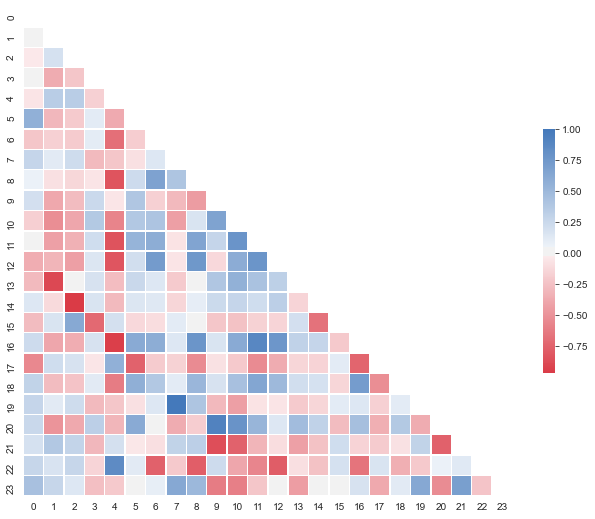

In [13]:
import seaborn as sns
# Compute correlations
corr = selected_x.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [14]:
corr

0         1         2         3         4         5         6   \
0   1.000000  0.043236 -0.038499  0.002173 -0.054904  0.563645 -0.219274   
1   0.043236  1.000000  0.190652 -0.359065  0.345719 -0.293306 -0.161933   
2  -0.038499  0.190652  1.000000 -0.222602  0.343426 -0.192788 -0.185932   
3   0.002173 -0.359065 -0.222602  1.000000 -0.162893  0.115132  0.105584   
4  -0.054904  0.345719  0.343426 -0.162893  1.000000 -0.364298 -0.683793   
5   0.563645 -0.293306 -0.192788  0.115132 -0.364298  1.000000 -0.184701   
6  -0.219274 -0.161933 -0.185932  0.105584 -0.683793 -0.184701  1.000000   
7   0.282107  0.117356  0.228100 -0.278316 -0.219246 -0.083711  0.138520   
8   0.063765 -0.083005 -0.123645 -0.054712 -0.830405  0.234465  0.674818   
9   0.203395 -0.381090 -0.271192  0.252887 -0.052286  0.396001 -0.165649   
10 -0.176513 -0.522497 -0.388146  0.371504 -0.573126  0.382957  0.411674   
11  0.037868 -0.420675 -0.335487  0.217761 -0.835004  0.536342  0.588246   
12 -0.351998 -0.308168 -0.424632  0.149430 -0.819207  0.213296  0.724441   
13 -0.277910 -0.891385  0.016824  0.177111 -0.265489  0.255953  0.139597   
14  0.143685 -0.108622 -0.969543  0.167555 -0.282111  0.148297  0.135589   
15 -0.274269  0.169003  0.620189 -0.717649  0.196586 -0.118034 -0.092777   
16  0.237246 -0.386739 -0.346862  0.180798 -0.945705  0.608919  0.588995   
17 -0.551617  0.220134  0.180888 -0.053343  0.568734 -0.747753 -0.192282   
18  0.298747 -0.270034 -0.235723  0.116315 -0.614370  0.572177  0.381299   
19  0.283695  0.117135  0.228050 -0.278393 -0.219309 -0.083329  0.139651   
20  0.255087 -0.486291 -0.370582  0.327828 -0.305909  0.609101 -0.020234   
21  0.190050  0.378030  0.289386 -0.293085  0.193391 -0.039200 -0.087794   
22  0.270302  0.170738  0.274887 -0.141283  0.849879  0.121418 -0.760750   
23  0.442527  0.270714  0.140893 -0.258369 -0.200821  0.027509  0.089292   

          7         8         9         10        11        12        13  \
0   0.282107  0.063765  0.203395 -0.176513  0.037868 -0.351998 -0.277910   
1   0.117356 -0.083005 -0.381090 -0.522497 -0.420675 -0.308168 -0.891385   
2   0.228100 -0.123645 -0.271192 -0.388146 -0.335487 -0.424632  0.016824   
3  -0.278316 -0.054712  0.252887  0.371504  0.217761  0.149430  0.177111   
4  -0.219246 -0.830405 -0.052286 -0.573126 -0.835004 -0.819207 -0.265489   
5  -0.083711  0.234465  0.396001  0.382957  0.536342  0.213296  0.255953   
6   0.138520  0.674818 -0.165649  0.411674  0.588246  0.724441  0.139597   
7   1.000000  0.401007 -0.289535 -0.424948 -0.067484 -0.060659 -0.196268   
8   0.401007  1.000000 -0.440006  0.161651  0.655036  0.759223  0.019637   
9  -0.289535 -0.440006  1.000000  0.664837  0.277634 -0.119289  0.393231   
10 -0.424948  0.161651  0.664837  1.000000  0.781093  0.596046  0.560030   
11 -0.067484  0.655036  0.277634  0.781093  1.000000  0.773534  0.423642   
12 -0.060659  0.759223 -0.119289  0.596046  0.773534  1.000000  0.317014   
13 -0.196268  0.019637  0.393231  0.560030  0.423642  0.317014  1.000000   
14 -0.131757  0.098202  0.242271  0.279705  0.218869  0.326806 -0.143707   
15  0.107637 -0.017586 -0.220747 -0.239647 -0.155423 -0.141417  0.205794   
16  0.140708  0.776850  0.165635  0.614548  0.880201  0.765621  0.307517   
17 -0.159726 -0.532912 -0.076967 -0.206956 -0.532537 -0.358167 -0.131753   
18  0.114544  0.516031  0.178077  0.443433  0.640231  0.495103  0.212794   
19  0.999956  0.401174 -0.289209 -0.425237 -0.067275 -0.061066 -0.196193   
20 -0.360461 -0.183998  0.920397  0.790196  0.526131  0.145596  0.475573   
21  0.293864  0.328242 -0.855287 -0.749459 -0.310283 -0.097044 -0.416661   
22 -0.203729 -0.773977  0.230752 -0.388797 -0.566728 -0.784790 -0.086201   
23  0.628167  0.501844 -0.608975 -0.597334 -0.216701 -0.008955 -0.432473   

          14        15        16        17        18        19        20  \
0   0.143685 -0.274269  0.237246 -0.551617  0.298747  0.283695  0.255087   
1  -0.108622  0.169003 -0.386739  0.220134 -0.270034  0.

In [15]:
#Saving Correlation Patterns to Dataframe
corr_x = selected_x.corr()
corr_y = selected_y.corr()
corr_z = selected_z.corr()

corr_x.to_csv('correlation_dataframe_x.csv')
corr_y.to_csv('correlation_dataframe_y.csv')
corr_z.to_csv('correlation_dataframe_z.csv')

In [16]:
#Collinearity Analysis
#Scan All correlations to find 
from tqdm import tqdm

corr_x_th=0.9
corr_y_th=0.9
corr_z_th=0.9

collinear_faults=[]
collinear_index=[]

for i in tqdm(range(corr.shape[0])):
    for j in range(i):
        if((abs(corr_x.iloc[i,j])>=corr_x_th) and (abs(corr_y.iloc[i,j])>=corr_y_th) and (abs(corr_z.iloc[i,j])>=corr_z_th)):
            print("Collinear Fault Detected ! ",(i,j)," correlations: ", (corr_x.iloc[i,j],corr_y.iloc[i,j],corr_z.iloc[i,j]))
            collinear_faults.append((i,j))
            collinear_index.append((corr_x.iloc[i,j],corr_y.iloc[i,j],corr_z.iloc[i,j]))
           

100%|██████████| 24/24 [00:00<00:00, 1535.86it/s]

Collinear Fault Detected !  (19, 7)  correlations:  (0.9999563904590759, 0.9999293868266269, -0.9999877634713014)
Collinear Fault Detected !  (20, 9)  correlations:  (0.9203974993798083, 0.9572753479481645, 0.9230273085835325)


In [17]:
#Get Min max and summary for all samples
stats_df=selected_x.describe()
stats_df_t=stats_df.T
stats_df_t

count      mean       std       min       25%       50%           75%  \
0   11875.0  0.036367  0.103813 -0.213440 -0.010364  0.008676  7.343450e-02   
1   11875.0  0.156623  0.176183 -0.370730  0.028313  0.105990  2.454250e-01   
2   11875.0  0.099887  0.156475 -0.056065 -0.001760  0.024712  1.241850e-01   
3   11875.0 -0.021999  0.100954 -0.531610 -0.032451  0.003976  2.239850e-02   
4   11875.0 -0.300490  0.582769 -1.591600 -0.154215 -0.001303  3.500200e-02   
5   11875.0  0.027398  0.071235 -0.197150 -0.003771  0.009790  2.879400e-02   
6   11875.0  0.019704  0.060441 -0.091579  0.000378  0.004757  9.263450e-03   
7   11875.0 -0.000128  0.000436 -0.001289 -0.000351 -0.000023 -1.414800e-06   
8   11875.0  0.046053  0.125401 -0.352520 -0.006827  0.023566  1.124700e-01   
9   11875.0  0.071497  0.170223 -0.224550 -0.007373  0.035064  9.471450e-02   
10  11875.0  0.158357  0.270524 -0.448520  0.002165  0.100460  3.890900e-01   
11  11875.0  0.064850  0.137889 -0.170240 -0.025974  0.010574  1.407650e-01   
12  11875.0  0.017510  0.120137 -0.336290 -0.052966  0.001190  6.963200e-02   
13  11875.0 -0.133511  0.219374 -0.836750 -0.178025 -0.023869 -1.535800e-03   
14  11875.0 -0.069990  0.134909 -0.507740 -0.052936 -0.005142  1.022500e-03   
15  11875.0  0.082777  0.212742 -0.076859 -0.001515 -0.000031  6.945650e-03   
16  11875.0  0.364235  0.667704 -0.111240  0.003966  0.026923  3.980400e-02   
17  11875.0 -0.017891  0.058249 -0.423770 -0.010353 -0.001546  4.926900e-03   
18  11875.0  0.008849  0.025020 -0.031664 -0.000406 -0.000014  6.333100e-04   
19  11875.0 -0.000128  0.000436 -0.001289 -0.000351 -0.000023 -3.585550e-08   
20  11875.0  0.053769  0.119322 -0.143800 -0.012062  0.016641  1.065200e-01   
21  11875.0 -0.109299  0.255549 -1.173800 -0.177720 -0.035003  2.303400e-02   
22  11875.0 -0.078648  0.206634 -0.751250 -0.119585 -0.002964  3.210650e-02   
23  11875.0  0.006741  0.128770 -0.275020 -0.075431  0.004996  7.932850e-02   

         max  
0   0.464890  
1   0.653540  
2   0.581360  
3   0.231820  
4   0.198360  
5   0.330360  
6   0.466390  
7   0.001709  
8   0.310260  
9   0.901230  
10  0.740560  
11  0.451210  
12  0.288500  
13  0.156590  
14  0.077636  
15  1.041800  
16  2.312500  
17  0.175290  
18  0.221300  
19  0.001709  
20  0.473670  
21  0.283250  
22  0.291470  
23  0.422190

In [18]:
import numpy as np
fig = px.scatter(stats_df_t, x=stats_df_t.index, y='mean',size='std' ,hover_data=['min','max'])
fig.show()

In [20]:
#Training and Validation Range Determination
upper_range=[]
lower_range=[]

#Set min max buckets
max_buckets=3

max_values_upper=stats_df_t.iloc[0:param_dim,7].values
max_val_upper=np.max(max_values_upper)
min_val_upper=np.min(max_values_upper)
range_val_upper=max_val_upper-min_val_upper

max_values_lower=stats_df_t.iloc[param_dim:,7].values
max_val_lower=np.max(max_values_lower)
min_val_lower=np.min(max_values_lower)
range_val_lower=max_val_lower-min_val_lower

for i in range(max_buckets):
    upper_range.append(min_val_upper+i*range_val_upper/max_buckets)
    lower_range.append(min_val_lower+i*range_val_lower/max_buckets)

print(lower_range)
print(upper_range)

[0.0017085999999999998, 0.7719723999999999, 1.5422361999999998]
[0.0017085999999999998, 0.3015490666666667, 0.6013895333333333]


In [21]:
#First n values hold upper limit, last n number hold lower limit
upper_range_dec=[1,2,3]
lower_range_dec=[1,2,3]
stats_df_t["upper_lower_ranges"]=""
for i in range(param_dim):
    for j in range(len(upper_range)):
        if(stats_df_t.iloc[i,7]<=upper_range[j]):
            stats_df_t.iloc[i,8]=upper_range_dec[len(upper_range)-1-j]
            break
        if(stats_df_t.iloc[i,7]>upper_range[len(upper_range)-1]):
            stats_df_t.iloc[i,8]=upper_range_dec[0]

for i in range(param_dim,2*param_dim):
    for j in range(len(lower_range)):
        if(stats_df_t.iloc[i,7]<=lower_range[j]):
            stats_df_t.iloc[i,8]=-lower_range_dec[len(lower_range)-1-j]
            break
        if(stats_df_t.iloc[i,7]>lower_range[len(lower_range)-1]):
            stats_df_t.iloc[i,8]=-lower_range_dec[0]

stats_df_t

count      mean       std       min       25%       50%           75%  \
0   11875.0  0.036367  0.103813 -0.213440 -0.010364  0.008676  7.343450e-02   
1   11875.0  0.156623  0.176183 -0.370730  0.028313  0.105990  2.454250e-01   
2   11875.0  0.099887  0.156475 -0.056065 -0.001760  0.024712  1.241850e-01   
3   11875.0 -0.021999  0.100954 -0.531610 -0.032451  0.003976  2.239850e-02   
4   11875.0 -0.300490  0.582769 -1.591600 -0.154215 -0.001303  3.500200e-02   
5   11875.0  0.027398  0.071235 -0.197150 -0.003771  0.009790  2.879400e-02   
6   11875.0  0.019704  0.060441 -0.091579  0.000378  0.004757  9.263450e-03   
7   11875.0 -0.000128  0.000436 -0.001289 -0.000351 -0.000023 -1.414800e-06   
8   11875.0  0.046053  0.125401 -0.352520 -0.006827  0.023566  1.124700e-01   
9   11875.0  0.071497  0.170223 -0.224550 -0.007373  0.035064  9.471450e-02   
10  11875.0  0.158357  0.270524 -0.448520  0.002165  0.100460  3.890900e-01   
11  11875.0  0.064850  0.137889 -0.170240 -0.025974  0.010574  1.407650e-01   
12  11875.0  0.017510  0.120137 -0.336290 -0.052966  0.001190  6.963200e-02   
13  11875.0 -0.133511  0.219374 -0.836750 -0.178025 -0.023869 -1.535800e-03   
14  11875.0 -0.069990  0.134909 -0.507740 -0.052936 -0.005142  1.022500e-03   
15  11875.0  0.082777  0.212742 -0.076859 -0.001515 -0.000031  6.945650e-03   
16  11875.0  0.364235  0.667704 -0.111240  0.003966  0.026923  3.980400e-02   
17  11875.0 -0.017891  0.058249 -0.423770 -0.010353 -0.001546  4.926900e-03   
18  11875.0  0.008849  0.025020 -0.031664 -0.000406 -0.000014  6.333100e-04   
19  11875.0 -0.000128  0.000436 -0.001289 -0.000351 -0.000023 -3.585550e-08   
20  11875.0  0.053769  0.119322 -0.143800 -0.012062  0.016641  1.065200e-01   
21  11875.0 -0.109299  0.255549 -1.173800 -0.177720 -0.035003  2.303400e-02   
22  11875.0 -0.078648  0.206634 -0.751250 -0.119585 -0.002964  3.210650e-02   
23  11875.0  0.006741  0.128770 -0.275020 -0.075431  0.004996  7.932850e-02   

         max upper_lower_ranges  
0   0.464890                  1  
1   0.653540                  1  
2   0.581360                  1  
3   0.231820                  2  
4   0.198360                  2  
5   0.330360                  1  
6   0.466390                  1  
7   0.001709                  3  
8   0.310260                  1  
9   0.901230                  1  
10  0.740560                  1  
11  0.451210                  1  
12  0.288500                 -2  
13  0.156590                 -2  
14  0.077636                 -2  
15  1.041800                 -1  
16  2.312500                 -1  
17  0.175290                 -2  
18  0.221300                 -2  
19  0.001709                 -3  
20  0.473670                 -2  
21  0.283250                 -2  
22  0.291470                 -2  
23  0.422190                 -2

In [22]:
upper_limit_rounded=stats_df_t.iloc[0:param_dim,8].values
lower_limit_rounded=stats_df_t.iloc[param_dim:,8].values
limit_dataframe = pd.DataFrame({
   'process_param_id':[i+1 for i in range(param_dim)],
   'lower_limit':lower_limit_rounded,
   'upper_limit':upper_limit_rounded})

#limit_dataframe=limit_dataframe.astype(float).round({"lower_limit":0, "upper_limit":0})

limit_dataframe=limit_dataframe.astype(float)
limit_dataframe.to_csv('limit_dataframe.csv')

limit_dataframe

process_param_id  lower_limit  upper_limit
0                1.0         -2.0          1.0
1                2.0         -2.0          1.0
2                3.0         -2.0          1.0
3                4.0         -1.0          2.0
4                5.0         -1.0          2.0
5                6.0         -2.0          1.0
6                7.0         -2.0          1.0
7                8.0         -3.0          3.0
8                9.0         -2.0          1.0
9               10.0         -2.0          1.0
10              11.0         -2.0          1.0
11              12.0         -2.0          1.0

# Range for all paramaters for training is -2 to +2 except kcc_id:4 from -1 to 1, kcc_id:7 from -3 to +3, validation ranges for all is twice the range

In [23]:
nominal_cop=pd.read_csv("nominal_cop_cross_member.csv",header=None)
nominal_cop.head()

0          1           2
0 -384.948609  57.785646 -221.943606
1 -390.967247  57.785646 -221.943606
2 -396.985885  57.785646 -221.943606
3 -403.004523  57.785646 -221.943606
4 -409.023161  57.785646 -221.943606

In [24]:
fig = px.scatter_3d(nominal_cop, x=0, y=1, z=2,hover_data=[nominal_cop.index],opacity=0.3,size_max=2)
fig.show()

In [25]:
#Checking for Full Factorial Sampling using itertools
import itertools
p1=[2,3,4]
p2=[5,6,7]
samples=itertools.product(p1,p2)
for sample in samples:
    print(sample)

(2, 5)
(2, 6)
(2, 7)
(3, 5)
(3, 6)
(3, 7)
(4, 5)
(4, 6)
(4, 7)


In [26]:
#PCA for data vizvalization
from sklearn.preprocessing import StandardScaler
dev_x=pd.concat([data_xdev[stage], data_ydev[stage],data_zdev[stage]], axis = 1)
print(dev_x.shape)

(24, 35625)


In [27]:
#Scaling with zero mean and variance 1
dev_x = StandardScaler().fit_transform(dev_x)

In [28]:
#PCA with 95% variance explanantion
var_limit=0.95
from sklearn.decomposition import PCA
pca = PCA(var_limit)
pca.fit(dev_x)
dev_pc = pca.transform(dev_x)
print(dev_pc.shape)
explained_var=pca.explained_variance_ratio_
print(explained_var)

(24, 9)
[0.35201759 0.18290489 0.1614479  0.09566291 0.05728133 0.04852298
 0.02542325 0.02345735 0.01400532]


In [29]:
col_names=[]
for i in range(len(explained_var)):
    col_names.append("pc_"+str(i+1))
dev_pc_df = pd.DataFrame(data = dev_pc, columns = col_names)
dev_pc_df.head()

pc_1        pc_2        pc_3        pc_4        pc_5       pc_6  \
0 -23.090431  -33.443959    5.173738  -15.717509  -36.135146 -18.713056   
1 -37.556861 -139.217229  223.400329  -13.427192    5.393467   7.288687   
2  24.527172   30.824702   29.167711   -6.117132  128.065352 -48.963468   
3   0.190878   17.656530  -23.712504   -4.365187  -28.363659  17.051913   
4  85.393440  -50.931817  -46.610022 -152.120757   38.851059  77.257621   

        pc_7       pc_8       pc_9  
0 -12.321620  32.989255   8.068316  
1  24.987046 -16.073137   5.595886  
2 -67.135805 -24.381550   6.449269  
3 -31.288384 -28.648163  19.799584  
4 -18.363259  21.593273  -9.641110

In [30]:
fig = px.scatter(dev_pc_df, x='pc_1', y='pc_2' ,text=dev_pc_df.index,hover_data=[dev_pc_df.index])
fig.update_traces(textposition='top center')
fig.show()

In [31]:
fig = px.scatter_3d(dev_pc_df, x='pc_1', y='pc_2', z='pc_3',hover_data=[dev_pc_df.index],opacity=0.3,size_max=2)
fig.show()

In [32]:
# TSNE for enhanced dimenionality reduction and vizvalization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3,perplexity=10)
dev_tsne = tsne.fit_transform(dev_x)
dev_tsne.shape

(24, 3)

In [33]:
col_names=[]
for i in range(dev_tsne.shape[1]):
    col_names.append("tsne_"+str(i+1))
dev_tsne_df = pd.DataFrame(data = dev_tsne, columns = col_names)
dev_tsne_df.head()

tsne_1      tsne_2      tsne_3
0    95.028847 -148.656540  -31.634995
1   275.215057 -125.624077  -96.040245
2   227.134857  388.969238 -197.175522
3  -205.889725  -54.507893  -17.862616
4 -1770.086060 -704.723267 -433.476318

In [34]:
fig = px.scatter(dev_tsne_df, x='tsne_1', y='tsne_2' ,text=dev_tsne_df.index,hover_data=[dev_tsne_df.index])
fig.update_traces(textposition='top center')
fig.show()

In [35]:
fig = px.scatter_3d(dev_tsne_df, x='tsne_1', y='tsne_2', z='tsne_3',hover_data=[dev_tsne_df.index],opacity=0.3,size_max=2)
fig.update_traces(textposition='top center')
fig.show()

In [36]:
#Nominal Process Parameter Analysis
nominal_filename_x="DX_crossmember_nominal_"
nominal_filename_y="DY_crossmember_nominal_"
nominal_filename_z="DZ_crossmember_nominal_"

nominal_dev_x=pd.read_csv("./data_export/"+nominal_filename_x+str(stage_dim)+".csv",header=None).iloc[:, :-1]
nominal_dev_y=pd.read_csv("./data_export/"+nominal_filename_y+str(stage_dim)+".csv",header=None).iloc[:, :-1]
nominal_dev_z=pd.read_csv("./data_export/"+nominal_filename_z+str(stage_dim)+".csv",header=None).iloc[:, :-1]

#Transposing for analysis
nominal_dev_x_t=nominal_dev_x.T
nominal_dev_y_t=nominal_dev_y.T
nominal_dev_z_t=nominal_dev_z.T

nominal_dev=pd.concat([nominal_dev_x_t,nominal_dev_y_t,nominal_dev_z_t],axis=1)
nominal_dev.columns=["x_dev","y_dev","z_dev"]
nominal_dev.head()

x_dev     y_dev     z_dev
0 -0.00001 -0.000216  0.000053
1 -0.00001 -0.000214  0.000053
2 -0.00001 -0.000211  0.000053
3 -0.00001 -0.000209  0.000053
4 -0.00001 -0.000207  0.000053

In [37]:
des_nominal_dev=nominal_dev.describe()
des_nominal_dev.to_csv('nominal_dev_stats.csv')
nominal_dev.describe()

x_dev         y_dev         z_dev
count  11875.000000  11875.000000  11875.000000
mean      -0.000128     -0.001344      0.000895
std        0.000436      0.003823      0.001162
min       -0.001289     -0.017303     -0.002348
25%       -0.000351     -0.001424      0.000075
50%       -0.000023     -0.000112      0.000187
75%       -0.000001      0.000373      0.001754
max        0.001709      0.003605      0.004692

In [38]:
fig = px.histogram(nominal_dev, x="x_dev")
fig.show()

In [39]:
fig = px.histogram(nominal_dev, x="y_dev")
fig.show()

In [40]:
fig = px.histogram(nominal_dev, x="z_dev")
fig.show()

In [45]:
# Weighted loss function
import tensorflow.keras.backend as K


In [42]:
#Weighted MSE loss function to give different weights to different process parameters
val=np.zeros(6)
val[:]=1/6
val

def weighted_mse(val):
    def loss(yTrue,yPred):

        #val = np.array([0.1,0.1,0.1,0.1,0.1]) 
        w_var = K.variable(value=val, dtype='float32', 
                                     name='weight_vec')
        #weight_vec = K.ones_like(yTrue[0,:]) #a simple vector with ones shaped as (60,)
        #idx = K.cumsum(ones) #similar to a 'range(1,61)'


        return K.mean((w_var)*K.square(yTrue-yPred))
    return loss


In [43]:
# 3D Resnet Convolution Network

import tensorflow.keras.backend as K 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Add, BatchNormalization, Input, LeakyReLU,Activation, Lambda, Concatenate, Flatten, Dense,UpSampling3D,GlobalAveragePooling3D

def resnet_conv3D(input_size=(64,64,64,3)):
    
    inputs = Input(input_size)
    x = inputs
    y = Conv3D(32, kernel_size=(4,4,4),strides=(2,2,2), name="conv_block_1")(x)
    res1=y
    
    y = LeakyReLU()(y)
    y = Conv3D(32, kernel_size=(3,3,3),strides=(1,1,1), padding='same',name="conv_block_2")(y)
    y = LeakyReLU()(y)
    y = Conv3D(32, kernel_size=(3,3,3),strides=(1,1,1), padding='same',name="conv_block_3")(y)
    y = Add()([res1, y])
    y = LeakyReLU()(y)
    
    y = Conv3D(32, kernel_size=(3,3,3),strides=(1,1,1), name="conv_block_4")(y)
    res2=y
    y = LeakyReLU()(y)
    
    y = Conv3D(32, kernel_size=(3,3,3),strides=(1,1,1), padding='same',name="conv_block_5")(y)
    y = LeakyReLU()(y)
    
    y = Conv3D(32, kernel_size=(3,3,3),strides=(1,1,1), padding='same',name="conv_block_6")(y)
    y = Add()([res2, y])
    y = LeakyReLU()(y)
    
    y = Conv3D(32, kernel_size=(3,3,3),strides=(1,1,1), name="conv_block_7")(y)
    res3=y
    y = LeakyReLU()(y)
    
    y = Conv3D(32, kernel_size=(3,3,3),strides=(1,1,1),padding='same', name="conv_block_8")(y)
    y = LeakyReLU()(y)
    
    y = Conv3D(32, kernel_size=(3,3,3),strides=(1,1,1),padding='same', name="conv_block_9")(y)
    
    y = Add()([res3, y])
    y = LeakyReLU()(y)
    
    y=Flatten()(y)
    
    output=Dense(5)(y)
    
    model=Model(inputs, outputs=output, name='Res_3D_CNN')
    
    model.compile(loss=weighted_mse(w_var), optimizer='adam', metrics=['mae'])
    
    print(model.summary())
    
    return model

In [44]:
import numpy as np
w_var = np.array([0.1,0.1,0.1,0.1,0.1])
model=resnet_conv3D()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "Res_3D_CNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 64,  0                                            
__________________________________________________________________________________________________
conv_block_1 (Conv3D)           (None, 31, 31, 31, 3 6176        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 31, 31, 31, 3 0           conv_block_1[0][0]               
__________________________________________________________________________________________________
conv_block_2 (Conv3D)           (None, 31, 31, 31, 3 27680       leaky